# **PERFORMANCE MEASURE (IOU method)**

In [1]:
results_list = []

In [2]:
# IoU analysis

# 00001.ppm [973, 335, 58, 55]              # GT bounding box
# 00001.ppm [976, 334, 1025, 388]           # Results bounding box

eg_gt_box = [973, 335, 1031, 390]           # Bounding box format (x1, y1, x2, y2)
eg_pred_box = [976, 334, 1025, 388]         # Bounding box format (x1, y1, x2, y2)



In [3]:
#Function for IoU Measurement

def intersection_over_union(gt_box, pred_box):
    inter_box_top_left = [max(gt_box[0], pred_box[0]), max(gt_box[1], pred_box[1])]
    inter_box_bottom_right = [min(gt_box[0]+gt_box[2], pred_box[0]+pred_box[2]), min(gt_box[1]+gt_box[3], pred_box[1]+pred_box[3])]

    inter_box_w = inter_box_bottom_right[0] - inter_box_top_left[0]
    inter_box_h = inter_box_bottom_right[1] - inter_box_top_left[1]

    intersection = inter_box_w * inter_box_h
    union = gt_box[2] * gt_box[3] + pred_box[2] * pred_box[3] - intersection
    
    iou = intersection / union

    return iou, intersection, union, 


In [4]:
#For image 00001.ppm

results_tuple = intersection_over_union(eg_gt_box, eg_pred_box)
results_list.append(results_tuple)

results_list

[(0.9840244099078427, 396675, 403115)]

[]

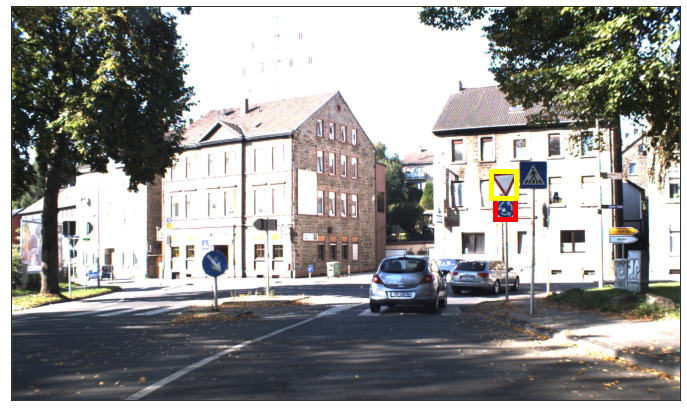

In [5]:
import imageio
import matplotlib.pyplot 
import matplotlib.patches
from skimage.transform import resize



im = imageio.imread("00001.ppm")    # present in Session VM

gt_box = [983, 388, 41, 44]                # format (x, y, w, h)
pred_box = [976, 334, 49, 54]              # format (x, y, w, h)

fig, ax = matplotlib.pyplot.subplots(1,figsize=(12, 8))
ax.imshow(im)

gt_rect = matplotlib.patches.Rectangle((gt_box[0], gt_box[1]),
                                       gt_box[2],
                                       gt_box[3],
                                       linewidth=5,
                                       edgecolor='r',
                                       facecolor='none')


pred_rect = matplotlib.patches.Rectangle((pred_box[0], pred_box[1]),
                                         pred_box[2],
                                         pred_box[3],
                                         linewidth=5,
                                         edgecolor=(1, 1, 0),
                                         facecolor='none')

ax.add_patch(gt_rect)
ax.add_patch(pred_rect)

ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

